## Regression models with `statmodels`

The work in this notebook assumes a good familiarity with linear regression models. The focus here will be primarily on using `statmodels` to do the analyses associated with linear regression. Additional details of any of the associated concepts can be found in the `references` section of the repo. The work in this section was done in `R`, but `statmodels` uses similar syntax.

The beauty of linear regression models are their **interpretability**. This also makes them an ideal first model to build in an analysis because they provide a good baseline for comparison with successive model builds.

### Python packages for regression

#### statsmodels
+ Optimized for insight (focus in this course)
+ Formulas are specified with the same syntax as used in `R`

#### scikit-learn
+ Optimized for prediction

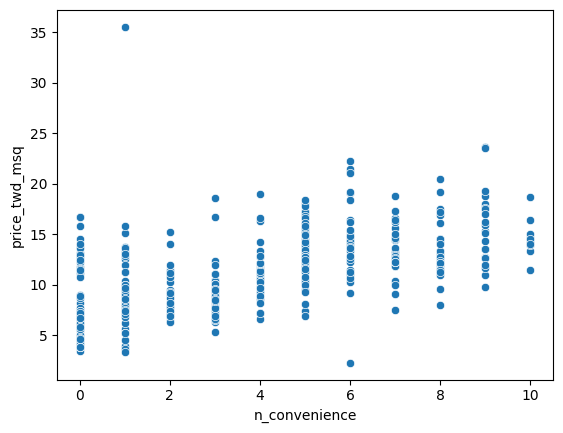

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

taiwan_real_estate = pd.read_csv("./data/taiwan_real_estate2.csv")

# Draw the scatter plot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate)

# Show the plot
plt.show()

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

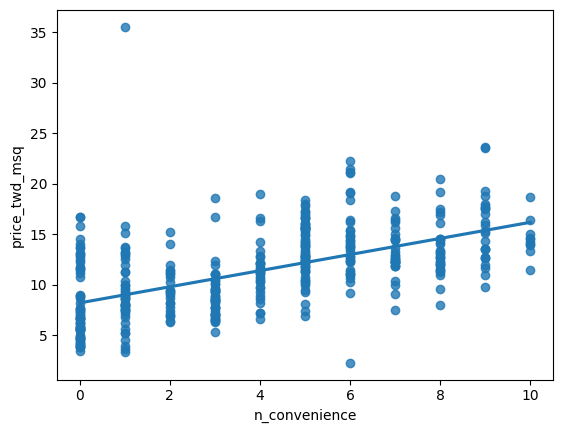

In [2]:
# with regression line
sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, ci=None)

## Linear regression with `ols()`



In [3]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


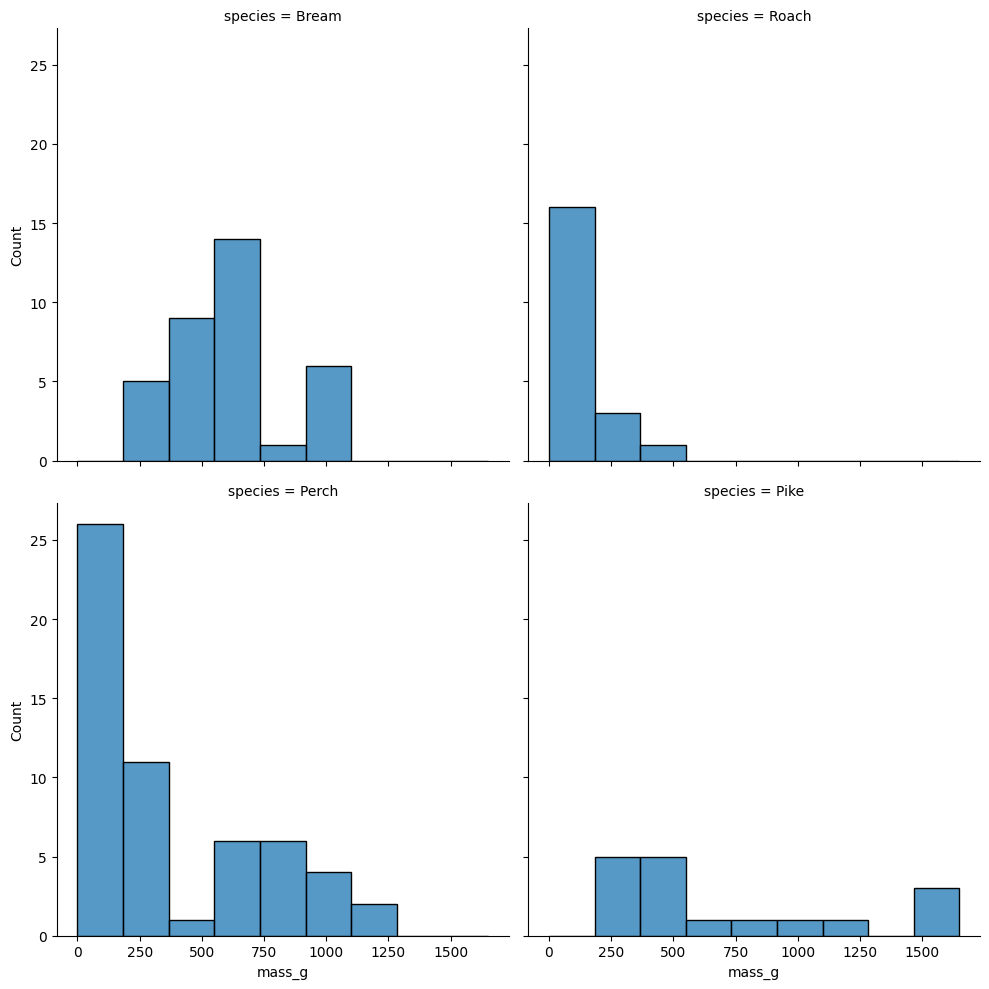

In [4]:
df_fish = pd.read_csv('./data/fish.csv')

sns.displot(data=df_fish, 
            x="mass_g", 
            col="species", 
            col_wrap=2, 
            bins=9) 
plt.show()

In [5]:
summary_stats = df_fish.groupby("species")["mass_g"].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [6]:
mdl_mass_vs_species = ols("mass_g ~ species", data=df_fish).fit()
print(mdl_mass_vs_species.params)  # notice the intercept is mean of Bream

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


Since these are categorical variables, inputs are 1 for the particular species of interest and 0 for the others. The above output sets the **Beam** level as the baseline, so means of the other 3 species can be computed from this baseline:

\begin{align*}
  & \text{response} = \text{fish weight in grams} = y = \beta_0 + \beta_1x_1 + \beta_2x_2+ \beta_3x_3 \\
  & y = 617.8286 - (235.5892)(\text{Perch}) + (100.8773)(\text{Pike}) - (465.7786)(\text{Roach}) \\
  & y_{Perch} = 617.8286 - 235.5892 = 382.2394 \\
  & y_{Pike} = 617.8286 + 100.8773 = 718.7059 \\
  & y_{Roach} = 617.8286 - 465.7786 = 152.05
\end{align*}

The above representation is useful for multiple linear regression, but simple linear regression, we may want everything relative to 0. To do this, we just need to rewrite the equation so that there is not intercept:

In [7]:
mdl_mass_vs_species = ols("mass_g ~ species + 0", data=df_fish).fit()
print(mdl_mass_vs_species.params) 

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


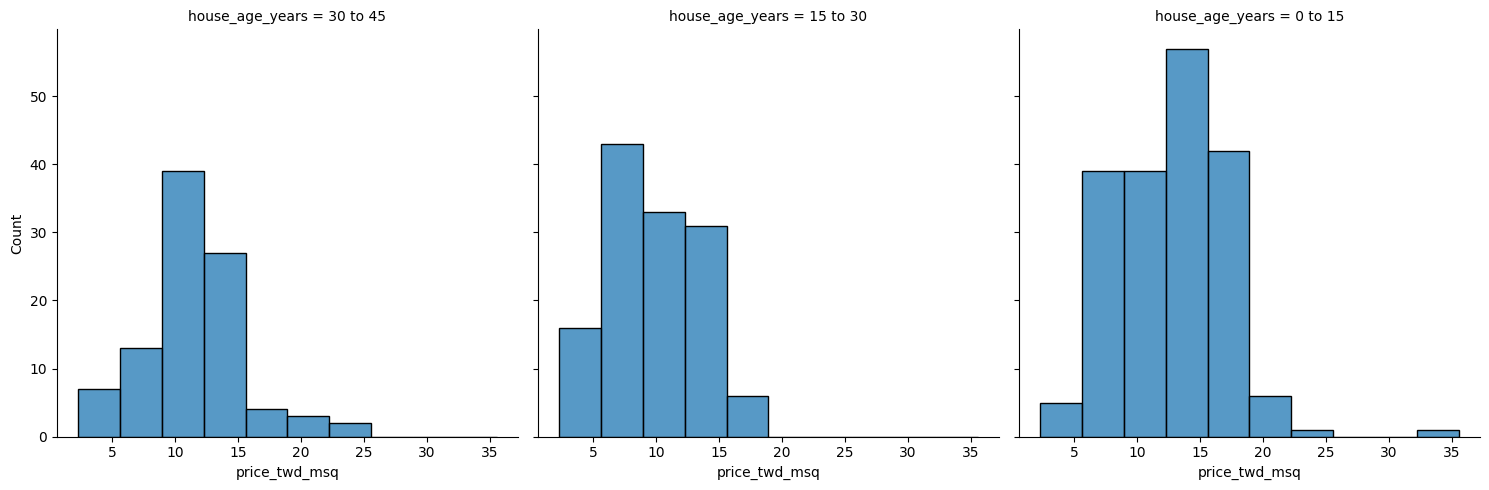

In [8]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x="price_twd_msq",
         col="house_age_years",
         bins=10)

# Show the plot
plt.show()

In [9]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [10]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [11]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## Back to the fish data...

Say we want to predict mass of a bream given it's length. First, filter out the bream samples and then plot mass vs. length. After that, we'll fit a model to use for predictions.

In [12]:
df_fish.columns

Index(['species', 'mass_g', 'length_cm'], dtype='object')

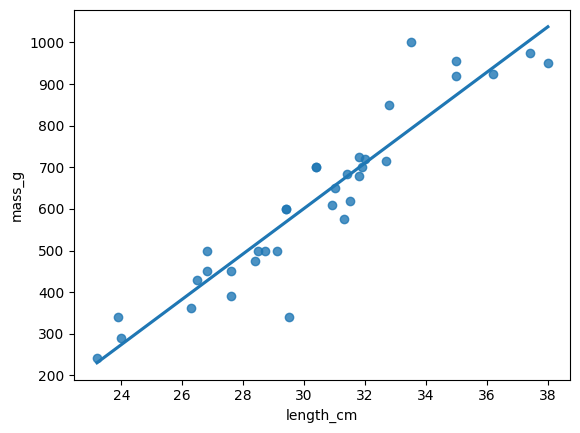

In [13]:
bream = df_fish.loc[df_fish['species'] == "Bream"]
sns.regplot(x="length_cm",
            y="mass_g",
           data=bream,
           ci=None)

plt.show()

In [14]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [15]:
import numpy as np
# create some lengths which we'll use to predict weights
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})  # 20 through 40
# need to pass a dataframe to predict - the df must contain the predictors (independent variables)
explanatory_data["predicted_mass_g"] = mdl_mass_vs_length.predict(explanatory_data)
explanatory_data.head()

,length_cm,predicted_mass_g
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977


In [16]:
# the course does this another way
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})  # reset
prediction_data = explanatory_data.assign( 
    mass_g=mdl_mass_vs_length.predict(explanatory_data) 
)

prediction_data.head()

,length_cm,mass_g
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977


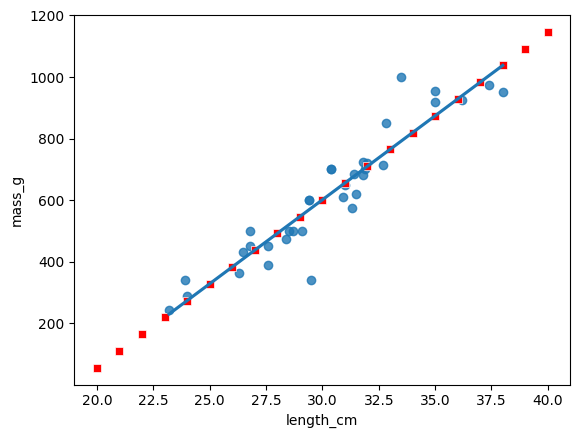

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 
fig = plt.figure()  # so we can overlay plots
sns.regplot(x="length_cm",
            y="mass_g", 
            ci=None, 
            data=bream)

sns.scatterplot(x="length_cm", 
                y="mass_g", 
                data=prediction_data,  
                color="red", 
                marker="s") 
plt.show() 

In [18]:
# Create the model with number of convenience stares
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()

mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 14 May 2025   Prob (F-statistic):           3.41e-37
Time:                        17:07:13   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## S&P 500 annual returns

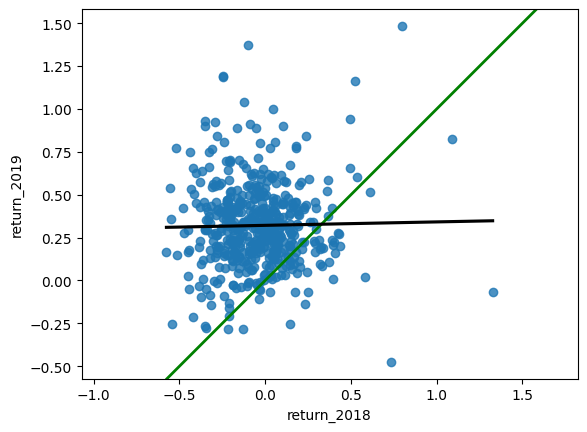

In [19]:
sp500_yearly_returns = pd.read_csv("./data/sp500_yearly_returns.csv")

fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018",
            y="return_2019",
            data=sp500_yearly_returns,
            ci=None,
            line_kws={"color": "black"})

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

In [20]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data = sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [21]:
# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


## Transforming the explanatory variable

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, we'll look at transforming the explanatory variable.

Taking another look at the Taiwan real estate dataset, this time we'll use the distance to the nearest MRT (metro) station as the explanatory variable.

In [22]:
taiwan_real_estate.columns

Index(['dist_to_mrt_m', 'n_convenience', 'house_age_years', 'price_twd_msq'], dtype='object')

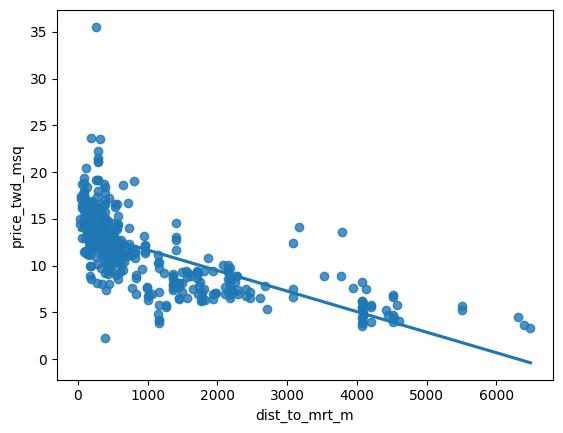

In [23]:
plt.figure()

sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None )


plt.show()

In [24]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
mdl_price_vs_dist.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [25]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

# add a layer to the plot

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


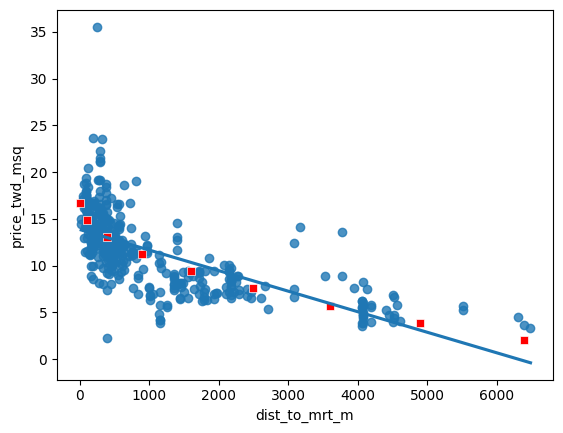

In [26]:
# un-tranformed prediction
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer for tranformed prediction points in red
sns.scatterplot(data=prediction_data, x="dist_to_mrt_m", y="price_twd_msq", color="red", marker="s")
plt.show()

## Transforming the response variable

The response variable can be transformed too, but this means we need an extra step at the end to undo that transformation - aka "back transform" the predictions.

A first step in a digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

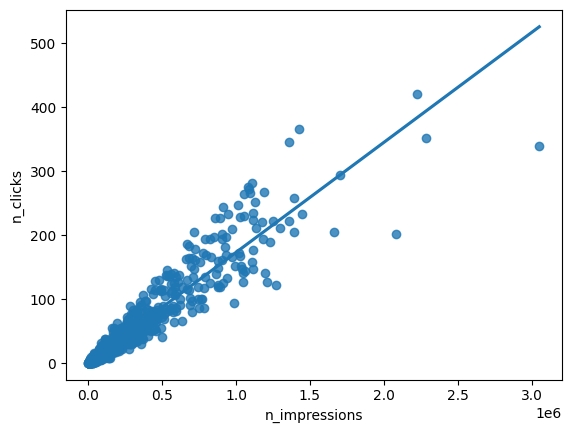

In [27]:
ad_conversion = pd.read_csv("./data/ad_conversion.csv")

sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)
plt.show()

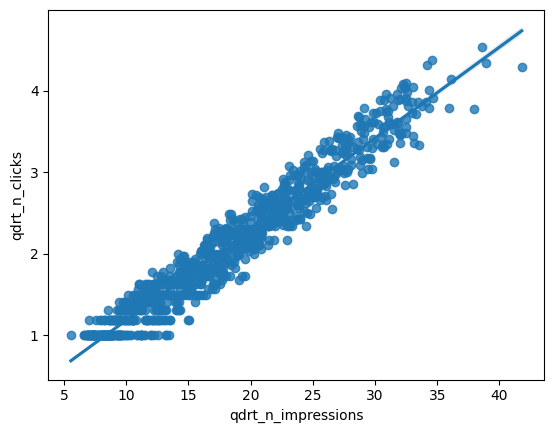

In [28]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = np.power(ad_conversion["n_impressions"], 0.25)
ad_conversion["qdrt_n_clicks"] = np.power(ad_conversion["n_clicks"], 0.25)

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion)
plt.show()

In [29]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression_trans.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


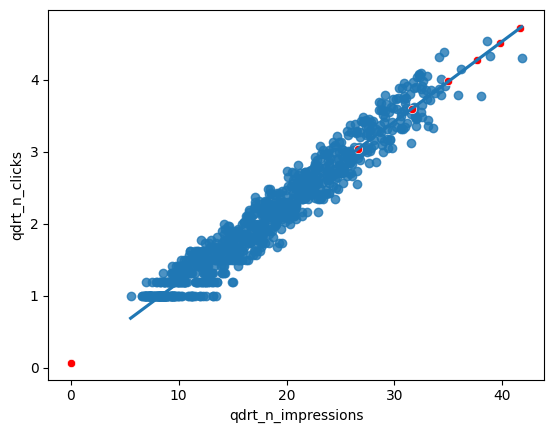

In [30]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data= prediction_data, color="red")
plt.show()

## Quantifying model fit

+ Coefficient of determination - $r^2$ (single explanitory variable) or $R^2$ (multiple expanitory variables)
  + (variance in the response variable that is predictable) / (total variance)
+ Can use `.rsquared` attribute or `.summary()` method on the `ols` fitted object
+ Can also square the correlation (`x.corr(y) ** 2`) for simple linear regression
+ Residual Standard Error (RSE see p66 of ISL for details) - typical error between prediciton and observed response
  + same units as response variable, compute from square root of MSE (next bullet)
+ Mean Square Error (MSE)
  + not included in summary, but can get from `.mse_resid` attribute
+ Root Mean Square Error ($\text{RMSE} = \sqrt{RSS / n}$)

In [31]:
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()

# summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        17:07:14   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [32]:
# coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


In [33]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478134
RSE of transformed model:  0.19690640896875722


## Visualizing model fit

+ Residual vs Fitted Values
+ Q-Q plot
+ Scale-location plot (square root of standardize residual vs. Fitted Value)

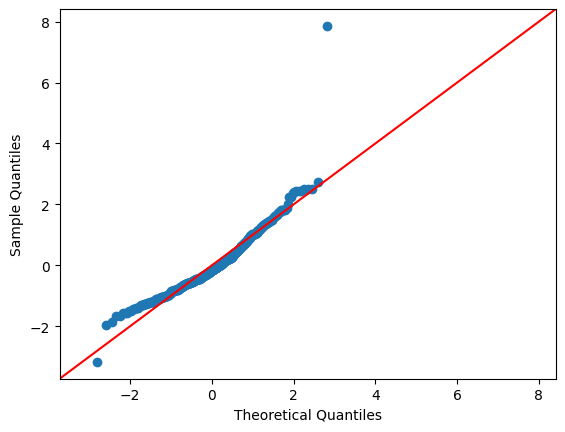

In [34]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

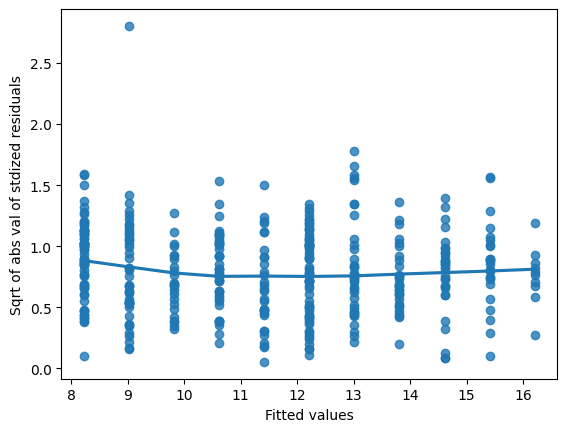

In [35]:
# Scale-location plot: Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

## Outliers, leverage, and influence

+ leverage
+ influence
+ Cook's distance

In [36]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values("leverage", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8             74.243101  0.021142  


In [37]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  


## Logistic Regression

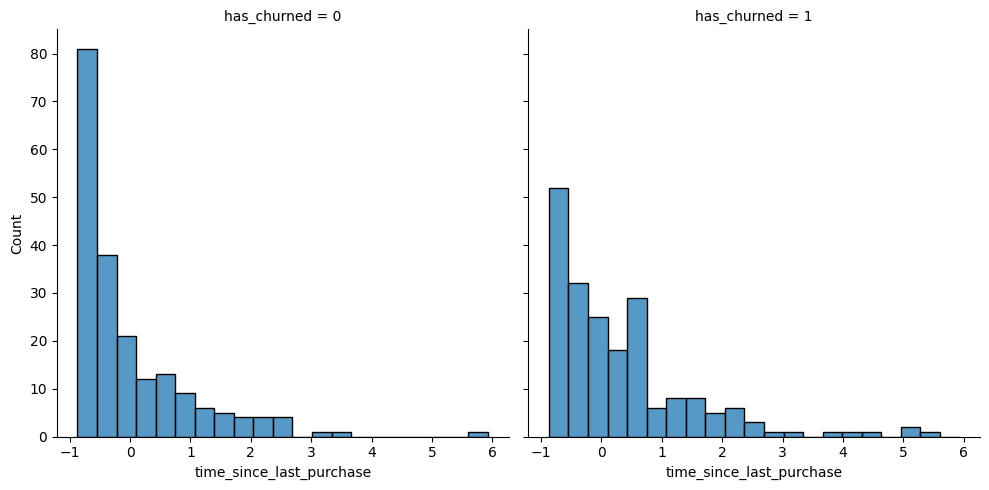

In [38]:
df_churn = pd.read_csv("./data/churn.csv")

# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=df_churn, x="time_since_last_purchase", col="has_churned")

plt.show()

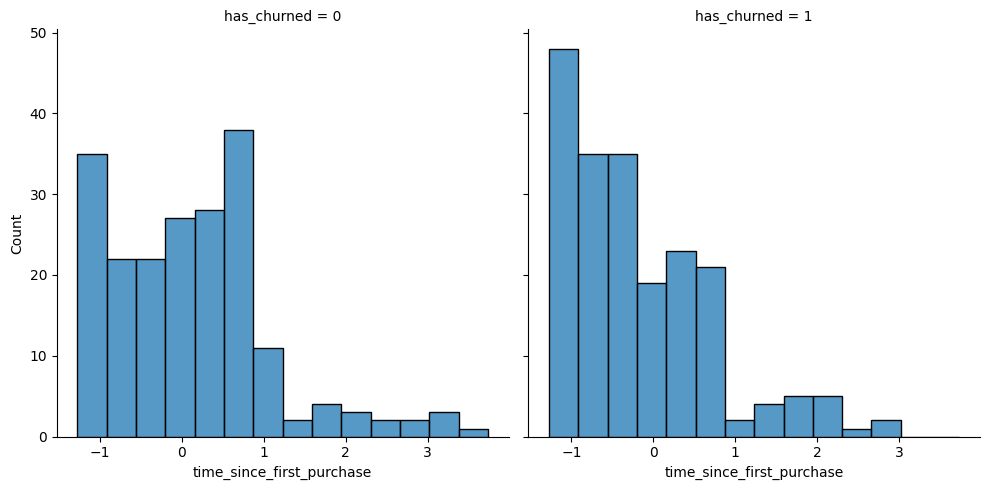

In [39]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=df_churn, x="time_since_first_purchase", col="has_churned")

plt.show()

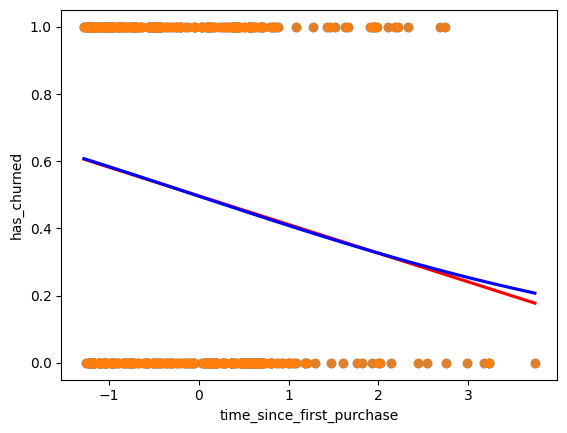

In [40]:
# linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=df_churn,
            ci=None,
            line_kws={"color": "red"})
            # logistic=True)

# logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=df_churn, 
            ci=None,
            logistic=True,
            line_kws={"color": "blue"})

plt.show()

In [41]:
from statsmodels.formula.api import logit

# Fit logistic regression of churn vs. length of relationship
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=df_churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Visualizing most likely outcome

The course makes an overly simplifying assumption that threshold probability = 0.5 which is fine under most use cases. However, more generally we should make the threshold a variable that we can set. This modification is made below.

In [42]:
threshold = 0.5  # make threshold explicit

mdl_recency = logit("has_churned ~ time_since_last_purchase", data = df_churn).fit()

explanatory_data = pd.DataFrame({"time_since_last_purchase": np.arange(-1, 6.25, 0.25)})

prediction_data = explanatory_data.assign( 
    has_churned = mdl_recency.predict(explanatory_data)) 
# prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])  # implied theshold = 0.5
prediction_data["most_likely_outcome"] = (prediction_data["has_churned"] > threshold).astype(float)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


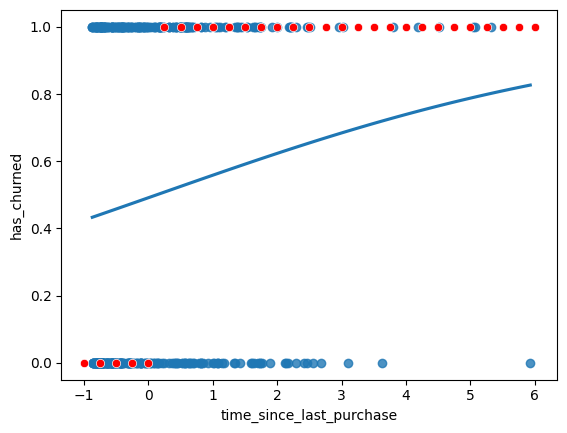

In [43]:
sns.regplot(x="time_since_last_purchase", 
            y="has_churned", 
            data=df_churn, 
            ci=None, 
            logistic=True)

sns.scatterplot(x="time_since_last_purchase", 
                y="most_likely_outcome", 
                data=prediction_data, 
                color="red")
plt.show() 

## Visualizing odds ratio

 Odds ratio is the probability of something  happening divided by the probability that it doesn't:

 $\Large\text{odds ratio} = \frac{\text{probability}}{1 - \text{probability}}$

In [44]:
# calc odds ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] /\
                                (1 - prediction_data["has_churned"])

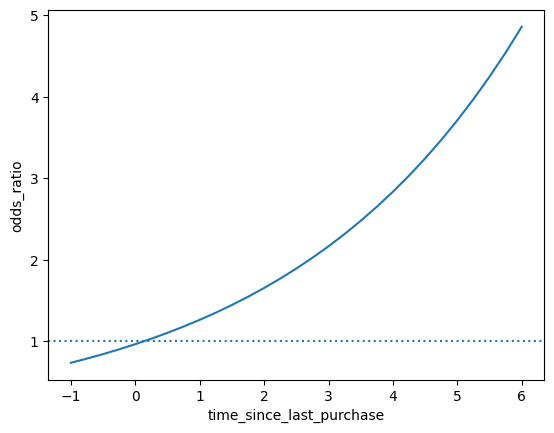

In [45]:
sns.lineplot(x="time_since_last_purchase",
             y="odds_ratio",
             data=prediction_data)
# dotted line for 50/50 chance of churn (odds ratio = 1)
plt.axhline(y=1,
            linestyle="dotted") 
plt.show()

In [46]:
# create data to predict on
explanatory_data = pd.DataFrame({"time_since_first_purchase": np.arange(-1.5, 4.25, 0.25)})

# create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# verify
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.25     0.605470
2                      -1.00     0.584096
3                      -0.75     0.562401
4                      -0.50     0.540465


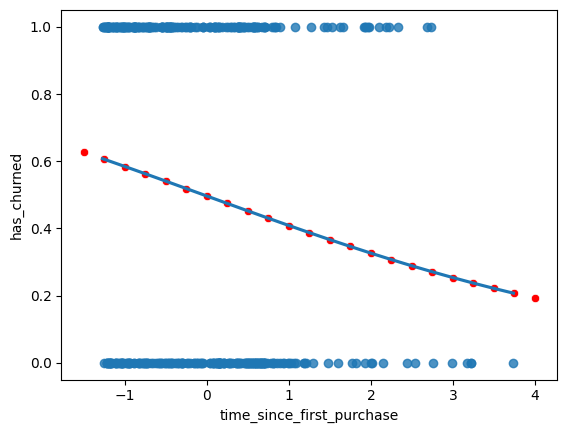

In [47]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x="time_since_first_purchase", 
            y="has_churned", 
            data=df_churn, 
            ci=None, 
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase", 
                y="has_churned", 
                data=prediction_data, 
                color="red")

plt.show()

## Most likely outcome

When explaining your results to a non-technical audience, we may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, we say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

In [48]:
# Update prediction data by adding most_likely_outcome
threshold = 0.5  # assume standard threshold

prediction_data["most_likely_outcome"] = (prediction_data["has_churned"] > threshold).astype(float) #np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.25     0.605470                  1.0
2                      -1.00     0.584096                  1.0
3                      -0.75     0.562401                  1.0
4                      -0.50     0.540465                  1.0


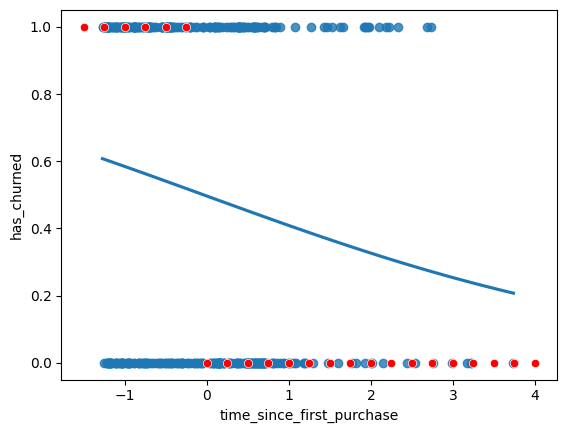

In [49]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=df_churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase", 
                y="most_likely_outcome", 
                data=prediction_data, 
                color="red")

plt.show()

In [50]:
# update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1. - prediction_data["has_churned"])

# verify
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.25     0.605470                  1.0    1.534661
2                      -1.00     0.584096                  1.0    1.404400
3                      -0.75     0.562401                  1.0    1.285197
4                      -0.50     0.540465                  1.0    1.176111


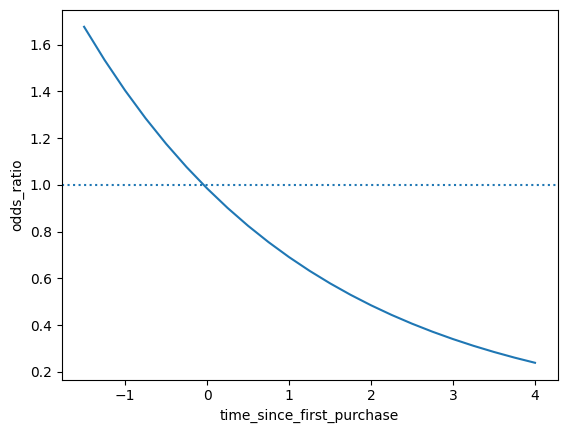

In [51]:
# update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="odds_ratio",
             data=prediction_data)

# add dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

In [52]:
# update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# verify
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.25     0.605470                  1.0    1.534661   
2                      -1.00     0.584096                  1.0    1.404400   
3                      -0.75     0.562401                  1.0    1.285197   
4                      -0.50     0.540465                  1.0    1.176111   

   log_odds_ratio  
0        0.517008  
1        0.428309  
2        0.339610  
3        0.250912  
4        0.162213  


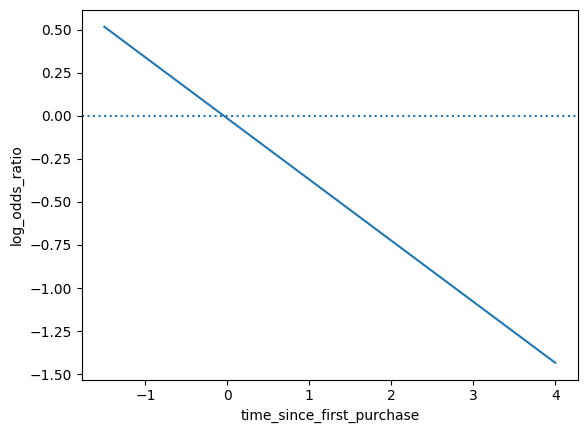

In [53]:
# Update the code for the line plot to plot log_odds_ratio versus time_since_first_purchase
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## References

+ An Introduction to Statistical Learning with Applications in R, 2nd Edition - James, Witten, Hastie, and Tibshirani (aka ISL)
+ How to change alignment of LaTeX equations in Jupyter notebooks:  https://www.codymd.com/left-align-latex-equation-in-jupyter-notebook/
+ tbd